In [83]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [84]:
img_width, img_height = 150, 150
batch_size = 32
epochs = 5

In [85]:
# You can add more data augmentation techniques if needed
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [86]:
train_data_dir = r"C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\tumor_data\Training"
test_data_dir = r"C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\tumor_data\Testing"

In [87]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height),
                                                  batch_size=batch_size, class_mode='binary')

Found 1222 images belonging to 2 classes.
Found 179 images belonging to 2 classes.


In [88]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [89]:
# Calculate the number of training samples and testing samples
num_train_samples = len(train_generator.filenames)
num_test_samples = len(test_generator.filenames)

# Define batch size and epochs
batch_size = 32
epochs = 20

# Calculate steps per epoch and validation steps
train_steps = num_train_samples // batch_size
test_steps = num_test_samples // batch_size

# Define the callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-6)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the learning rate scheduler callback
history = model.fit(train_generator, steps_per_epoch=train_steps, epochs=epochs,
                    validation_data=test_generator, validation_steps=test_steps,
                    callbacks=[reduce_lr])


Epoch 1/20
38/38 [==============================] - 23s 559ms/step - loss: 0.4510 - accuracy: 0.8092 - val_loss: 0.7153 - val_accuracy: 0.6625 - lr: 0.0010
Epoch 2/20
38/38 [==============================] - 21s 550ms/step - loss: 0.1654 - accuracy: 0.9471 - val_loss: 0.2335 - val_accuracy: 0.9187 - lr: 0.0010
Epoch 3/20
38/38 [==============================] - 21s 544ms/step - loss: 0.0750 - accuracy: 0.9714 - val_loss: 0.8796 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/20
38/38 [==============================] - 23s 615ms/step - loss: 0.0609 - accuracy: 0.9798 - val_loss: 0.3378 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/20
38/38 [==============================] - 22s 573ms/step - loss: 0.0295 - accuracy: 0.9899 - val_loss: 0.4468 - val_accuracy: 0.8562 - lr: 0.0010
Epoch 6/20
38/38 [==============================] - 21s 543ms/step - loss: 0.0208 - accuracy: 0.9924 - val_loss: 0.1027 - val_accuracy: 0.9563 - lr: 0.0010
Epoch 7/20
38/38 [==============================] - 22s 564ms/st

In [90]:
# Get predictions for the test data
predictions = model.predict(test_generator)
binary_predictions = np.round(predictions).flatten()

# Get the true labels for the test data
true_labels = test_generator.classes

# Calculate accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, binary_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Calculate other evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report:')
print(classification_report(true_labels, binary_predictions))

print('Confusion Matrix:')
print(confusion_matrix(true_labels, binary_predictions))


6/6 [==============================] - 1s 152ms/step
Accuracy: 0.5419
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       105
           1       0.44      0.39      0.41        74

    accuracy                           0.54       179
   macro avg       0.52      0.52      0.52       179
weighted avg       0.53      0.54      0.54       179

Confusion Matrix:
[[68 37]
 [45 29]]


1/1 [==============================] - 0s 50ms/step


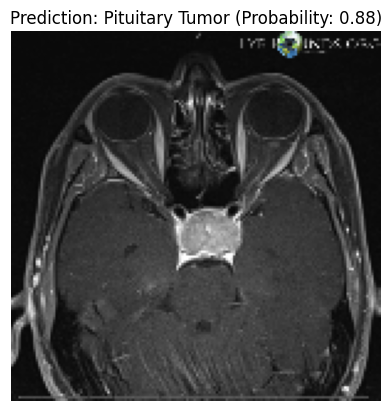

In [98]:
import matplotlib.pyplot as plt
import cv2

def plot_prediction(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess the image for prediction
    img = cv2.resize(img, (img_width, img_height))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Get the prediction
    prediction = model.predict(img)
    probability = prediction[0][0]
    class_label = 'Pituitary Tumor' if probability >= 0.5 else 'No Tumor'
    
    # Plot the image and prediction
    plt.imshow(img[0])
    plt.title(f'Prediction: {class_label} (Probability: {probability:.2f})')
    plt.axis('off')
    plt.show()

# Replace 'YOUR_IMAGE_PATH' with the path to the image you want to test
image_path_to_test = r"C:\Users\rithv\OneDrive\Desktop\tumor-classifer-3-types\healthybrain.jpg"
plot_prediction(image_path_to_test)
